In [119]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import glob

In [120]:
files = glob.glob("../data/*EL.csv")
dfs = []
id_num = []
for f in files:
    id_num.append(int(f.rsplit("id")[1].rsplit("-")[0].lstrip("0")))
    dfs.append(pd.read_csv(f))
for i in range(len(dfs)):
    dfs[i]['id'] = id_num[i]
df = pd.concat(dfs, sort=False)

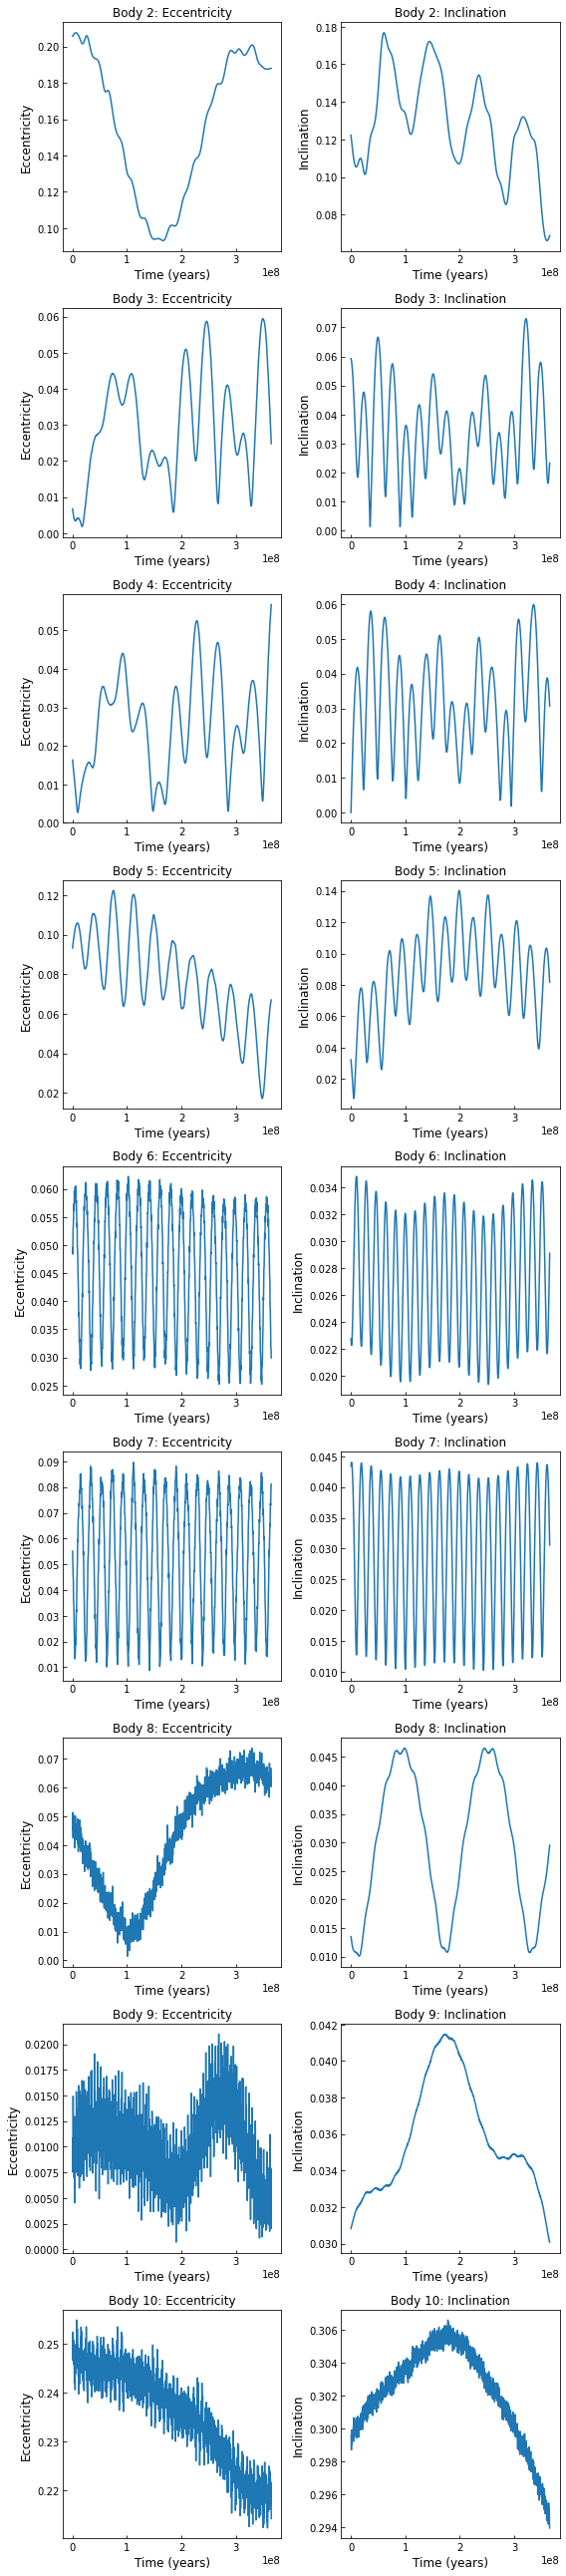

In [129]:
fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(8,36))

for i in range(2,11):
    ax[i-2,0].plot(df.loc[df['id'] == i][' t'], df.loc[df['id'] == i]['e'])
    ax[i-2,0].set_xlabel('Time (years)', fontsize=12)
    ax[i-2,0].set_ylabel('Eccentricity', fontsize=12)
    ax[i-2,0].set_title(f'Body {i}: Eccentricity', fontsize=12)
    ax[i-2,0].tick_params(axis='both',direction='in')

    ax[i-2,1].plot(df.loc[df['id'] == i][' t'], df.loc[df['id'] == i]['inc'])
    ax[i-2,1].set_xlabel('Time (years)', fontsize=12)
    ax[i-2,1].set_ylabel('Inclination', fontsize=12)
    ax[i-2,1].set_title(f'Body {i}: Inclination', fontsize=12)
    ax[i-2,1].tick_params(axis='both',direction='in')

plt.tight_layout()

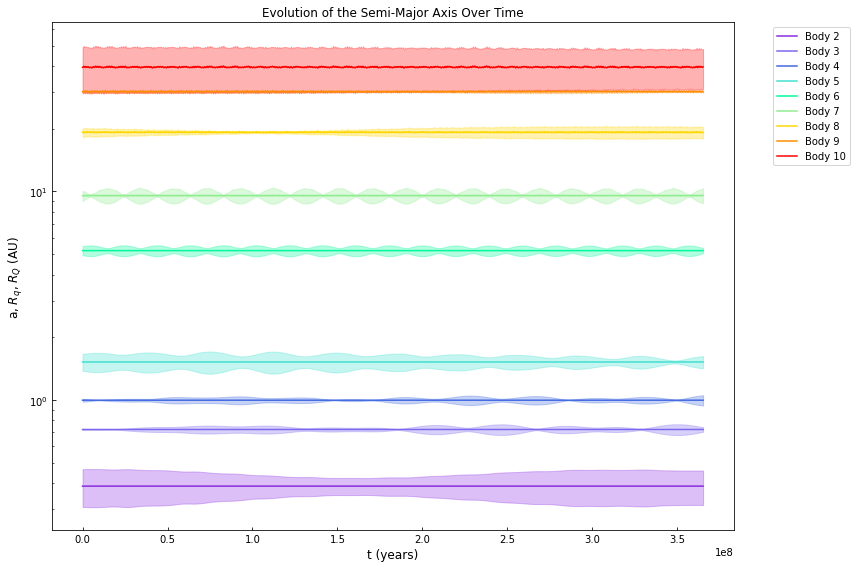

In [133]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

colors = ['blueviolet', 'mediumslateblue', 'royalblue', 'turquoise', 'mediumspringgreen', 'lightgreen', 'gold', 'darkorange', 'red']

for i in range(2,11):
    rp = df.loc[df['id'] == i]['a'] * (1 - df.loc[df['id'] == i]['e'])
    ra = df.loc[df['id'] == i]['a'] * (1 + df.loc[df['id'] == i]['e'])
    plt.semilogy(df.loc[df['id'] == i][' t'], df.loc[df['id'] == i]['a'], c=colors[i-2], label=f'Body {i}')
    plt.fill_between(df.loc[df['id'] == i][' t'], rp, ra, color=colors[i-2], alpha=0.3)

plt.tick_params(axis='both',direction='in', which='both')
plt.xlabel('t (years)', fontsize=12)
plt.ylabel('a, $R_q$, $R_Q$ (AU)', fontsize=12)
plt.title('Evolution of the Semi-Major Axis Over Time', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()